## House Prices Prediction using TensorFlow Decision Forests

In [4]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

2023-07-24 12:45:24.188914: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load the dataset

In [9]:
#Load the dataset
df = pd.read_csv("/Users/candicewu/Desktop/cleaned_dataset.csv")
print("Full dataset shape is {}".format(df.shape))

Full dataset shape is (20567, 18)


In [10]:
df.head()

,price_log,condition,grade,floors,view,bedrooms,bathrooms_sqrt,sqft_living_log,sqft_lot_log,house_age,school_rate,unemployment_rate,travel_time_to_work,total_population,typical_levy_rate,median_age,median_household_income,area_crime
0,5.640978,4,9,2.0,0,3,1.500000,3.294466,4.545307,46,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
1,5.799341,3,9,2.0,0,4,1.658312,3.432969,4.571441,23,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
2,5.579646,4,7,1.0,0,3,1.581139,3.217484,4.147800,37,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
3,5.720893,5,7,1.0,0,5,1.322876,3.406540,4.856572,63,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
4,5.612784,4,8,1.0,0,3,1.500000,3.255273,4.564713,45,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0


There are 17 features columns, and I am going to use those features to predict the house price.

In [6]:
# check the types of feature columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20567 entries, 0 to 20566
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                20567 non-null  float64
 1   condition                20567 non-null  int64  
 2   grade                    20567 non-null  int64  
 3   floors                   20567 non-null  float64
 4   view                     20567 non-null  int64  
 5   bedrooms                 20567 non-null  int64  
 6   bathrooms_sqrt           20567 non-null  float64
 7   sqft_living_log          20567 non-null  float64
 8   sqft_lot_log             20567 non-null  float64
 9   house_age                20567 non-null  int64  
 10  school_rate              20567 non-null  float64
 11  unemployment_rate        20567 non-null  float64
 12  travel_time_to_work      20567 non-null  float64
 13  total_population         20567 non-null  float64
 14  typical_levy_rate     

### Distribution Plots


count    20567.000000
mean         5.660924
std          0.227154
min          4.875061
25%          5.503791
50%          5.648360
75%          5.802774
max          6.886491
Name: price_log, dtype: float64


/var/folders/rc/k2hbzd5x5735hz5cxlddg6x80000gn/T/ipykernel_911/932558462.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_log'], color='g', bins=100, hist_kws={'alpha': 0.4});


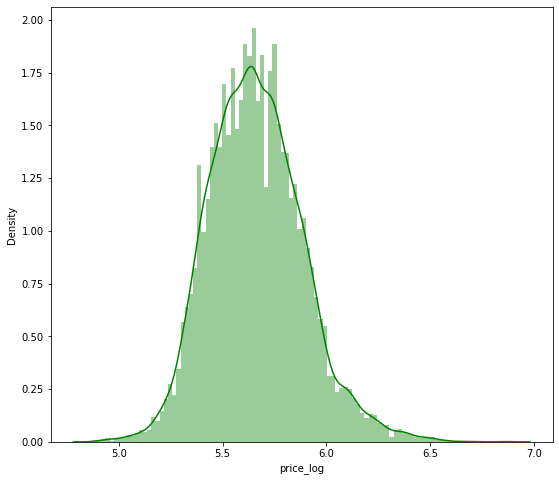

In [7]:
#understand house price distribution
print(df['price_log'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['price_log'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [11]:
#Numerical data distribution
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,price_log,condition,grade,floors,view,bedrooms,bathrooms_sqrt,sqft_living_log,sqft_lot_log,house_age,school_rate,unemployment_rate,travel_time_to_work,total_population,typical_levy_rate,median_age,median_household_income,area_crime
0,5.640978,4,9,2.0,0,3,1.500000,3.294466,4.545307,46,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
1,5.799341,3,9,2.0,0,4,1.658312,3.432969,4.571441,23,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
2,5.579646,4,7,1.0,0,3,1.581139,3.217484,4.147800,37,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
3,5.720893,5,7,1.0,0,5,1.322876,3.406540,4.856572,63,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
4,5.612784,4,8,1.0,0,3,1.500000,3.255273,4.564713,45,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0


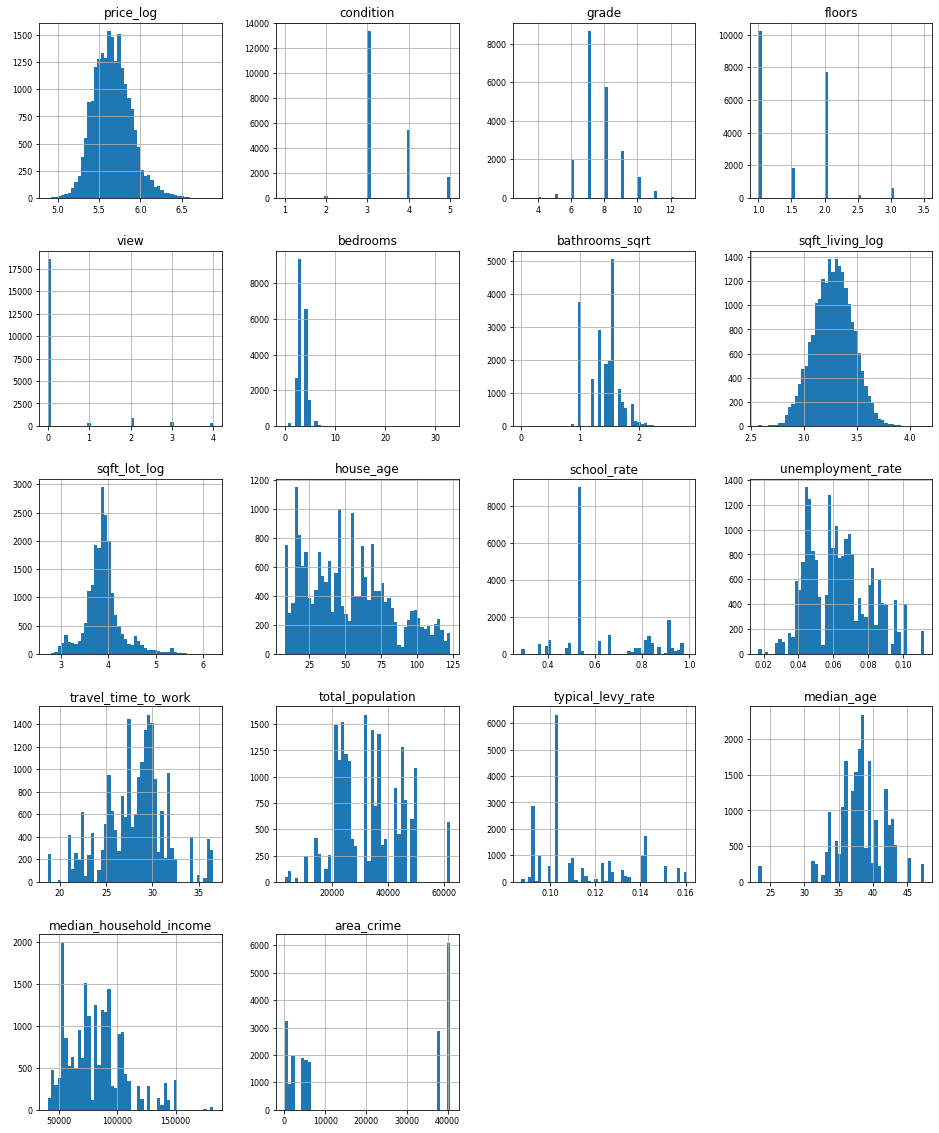

In [12]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

let me split the dataset into training and testing datasets:

In [13]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

14466 examples in training, 6101 examples in testing.


There's one more step required before I can train the model. I need to convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset).</p>

TensorFlow Datasets is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.</p>

By default the Random Forest Model is configured to train classification tasks. Since this is a regression problem, I will specify the type of the task (tfdf.keras.Task.REGRESSION) as a parameter here.</p>

In [14]:
label = 'price_log'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

### Select a Model
To start, I'll work with a Random Forest. This is the most well-known of the Decision Forest training algorithms.</p>

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). The algorithm is unique in that it is robust to overfitting, and easy to use.

In [15]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [16]:
#select a template that are provided from kaggle
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /var/folders/rc/k2hbzd5x5735hz5cxlddg6x80000gn/T/tmpfuxbx8yb as temporary training directory


### Create a Random Forest 
I will use the defaults to create the Random Forest Model while specifiyng the task type as tfdf.keras.Task.REGRESSION

In [17]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, use this to include a list of eval metrics

Use /var/folders/rc/k2hbzd5x5735hz5cxlddg6x80000gn/T/tmph6_k3ocs as temporary training directory


Train the model </p>
I will train the model using a one-liner.

In [18]:
rf.fit(x=train_ds)

Reading training dataset...


Training dataset read in 0:00:07.717087. Found 14466 examples.
Training model...


[INFO 23-07-24 13:06:40.8423 PDT kernel.cc:1243] Loading model from path /var/folders/rc/k2hbzd5x5735hz5cxlddg6x80000gn/T/tmph6_k3ocs/model/ with prefix 91e74040cf9e429d
[INFO 23-07-24 13:06:45.5558 PDT decision_forest.cc:660] Model loaded with 300 root(s), 1050274 node(s), and 17 input feature(s).
[INFO 23-07-24 13:06:45.5559 PDT abstract_model.cc:1312] Engine "RandomForestOptPred" built
[INFO 23-07-24 13:06:45.5559 PDT kernel.cc:1075] Use fast generic engine


Model trained in 0:00:16.795836
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


### Visualize the model</P>
The default number of trees used in the Random Forests is 300. I can select a tree to display below.

In [19]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

Evaluate the model on the Out of bag (OOB) data and the validation dataset</P>
Before training the dataset I have manually seperated 20% of the dataset for validation named as valid_ds.</P>

I can also use Out of bag (OOB) score to validate the RandomForestModel. To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB). OOB score is computed on the OOB data.</p>

The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let me plot this.</p>

Note: Smaller values are better for this hyperparameter.

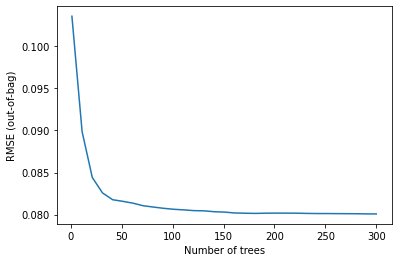

In [20]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [21]:
#see some general stats on the OOB dataset:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=14466, accuracy=None, loss=None, rmse=0.08008169293259283, ndcg=None, aucs=None, auuc=None, qini=None)

In [22]:
#run an evaluation using the validation dataset.
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

7/7 [==============================] - 2s 65ms/step - loss: 0.0000e+00 - mse: 0.0062
loss: 0.0000
mse: 0.0062


Variable importances</p>
Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests. Let me list the available Variable Importances for Decision Trees:

In [23]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


As an example, let me display the important features for the Variable Importance NUM_AS_ROOT.

The larger the importance score for NUM_AS_ROOT, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [24]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("grade" (1; #6), 119.0),
 ("sqft_living_log" (1; #11), 73.0),
 ("median_household_income" (1; #9), 33.0),
 ("travel_time_to_work" (1; #14), 31.0),
 ("unemployment_rate" (1; #16), 28.0),
 ("bathrooms_sqrt" (1; #2), 9.0),
 ("typical_levy_rate" (1; #15), 4.0),
 ("school_rate" (1; #10), 3.0)]

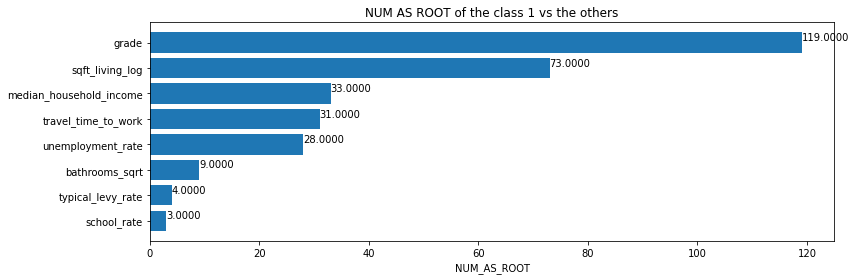

In [25]:
#Plot the variable importances from the inspector using Matplotlib
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()